# Ensemble Learning
## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Voting Classifiers

Let's use the moons dataset:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42) ## generate random data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
dtr_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors = 3)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dtr_clf), ('knn', knn_clf)],
    voting='hard')

In [6]:
voting_clf.get_params()

{'estimators': [('lr', LogisticRegression(random_state=42)),
  ('dt', DecisionTreeClassifier(random_state=42)),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'lr': LogisticRegression(random_state=42),
 'dt': DecisionTreeClassifier(random_state=42),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_impurity_split': None,
 'dt__min_samples_leaf': 1,


In [7]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, dtr_clf,knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
KNeighborsClassifier 0.896
VotingClassifier 0.904


# Bagging and Pasting

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
bag_clf.get_params()


{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 100,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Train a "simple" decision tree in contrast and evaluate the accurancy

In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.912


In [14]:
rnd_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 16,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

A Random Forest is equivalent to a bag of decision trees:

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [16]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


## Feature Importance

### Diabetes data: select and prepare data

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
diabetes = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/diabetes.csv")
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#Spliting dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set]
target = diabetes.label

### Diabetes data: split dataset

In [20]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Diabetes data: train random forrest model

In [21]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16, random_state=42)
rnd_clf.fit(feature_train,target_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

###  Diabetes data: evaluate random forest model

In [22]:
target_pred = rnd_clf.predict(feature_test)
print(accuracy_score(target_test, target_pred))

0.7619047619047619


In [23]:
#Print feature importance
for name, score in zip(feature_set, rnd_clf.feature_importances_):
    print(name, score)

pregnant 0.0596791694937236
insulin 0.0679218158097347
bmi 0.18599011296302081
age 0.17153427598815596
glucose 0.3828602471876601
bp 0.05382292519949445
pedigree 0.0781914533582104


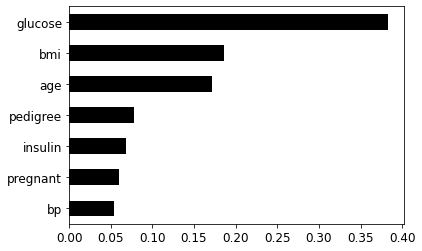

In [25]:
#Create a pd.Series of features importances
importances_rnd_clf = pd.Series(rnd_clf.feature_importances_, index = feature_set)
# Sort importances_rnd_clf
sorted_importances_rf = importances_rnd_clf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='black'); plt.show()

# Boosting: AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth= 1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 42}

In [27]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.896


# Boosting: Gradient Boosting

Let create a simple quadratic dataset:

In [30]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

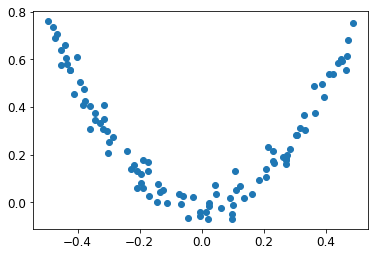

In [31]:
import matplotlib.pyplot as plt 
plt.scatter(X, y)

Now let's train a decision tree regressor on this dataset:

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [33]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [35]:
X_new = np.array([[0.8]])

In [36]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [37]:
y_pred

array([0.75026781])

Now let's try a gradient boosting regressor:

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

**Gradient Boosting with Early stopping:**

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

# Boosting: Extreme Gradient Boosting

**Using XGBoost for regression:**

In [2]:
try:
    import xgboost as xgb
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

### Diabetes data: train XGBoost

In [3]:
# Instantiate the XGBClassifier with 25 boosting rounds and error evaluation metric
xgb_clf = xgb.XGBClassifier(n_estimators=100, eval_metric='error', random_state=42)

# Fit the classifier to the training set
xgb_clf.fit(feature_train,target_train)

NameError: name 'feature_train' is not defined

### Diabetes data: evlauate XGBoost model

In [65]:
target_pred = xgb_clf.predict(feature_test)
print(accuracy_score(target_test, target_pred))

0.7662337662337663


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

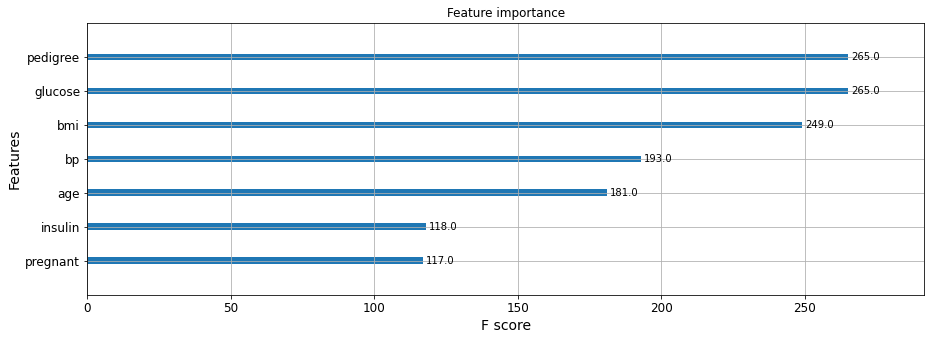

In [72]:
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5

xgb.plot_importance(xgb_clf, importance_type="weight")

How is importance calculated? Here's an excerpt from the [documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting):

> **importance_type (str, default "weight") –**
> How the importance is calculated: either “weight”, “gain”, or “cover”
> - ”weight” is the number of times a feature appears in a tree
> - ”gain” is the average gain of splits which use the feature
> - ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

We'll focus on the first two. Gain is a way to quantify how much a feature contributes to improving accuracy. Let's try out `gain` to see how it differs from `weight`.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

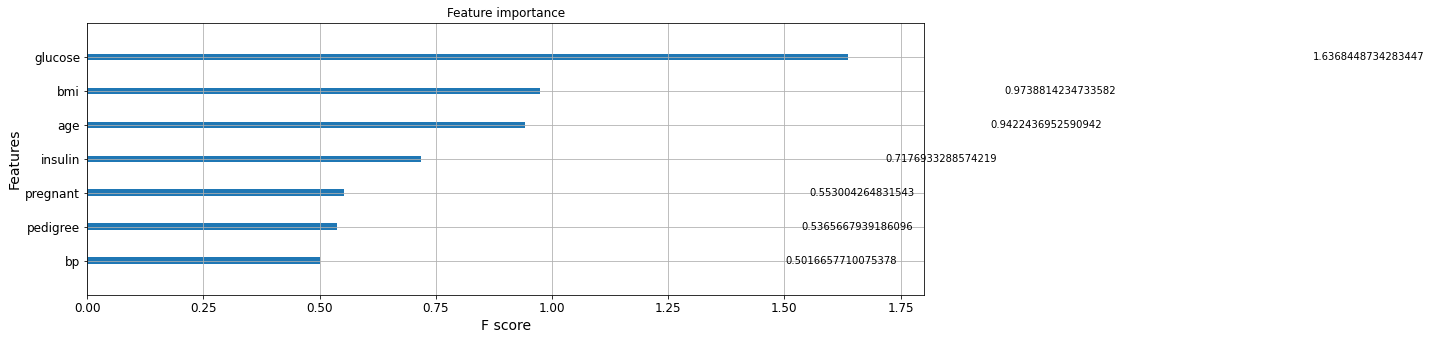

In [82]:
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")



Here we see the ordering of features differs quite a bit between `gain` and `weight`! This implies that (1) feature importance can be subjective, and (2) the number of appearances a feature has on a tree is not necessarily correlated to how much gain it brings. For example, a binary variable has less of a chance to appear as many times as a continuous variable on a tree, since there are only two outputs. However, it can still be a powerful feature.

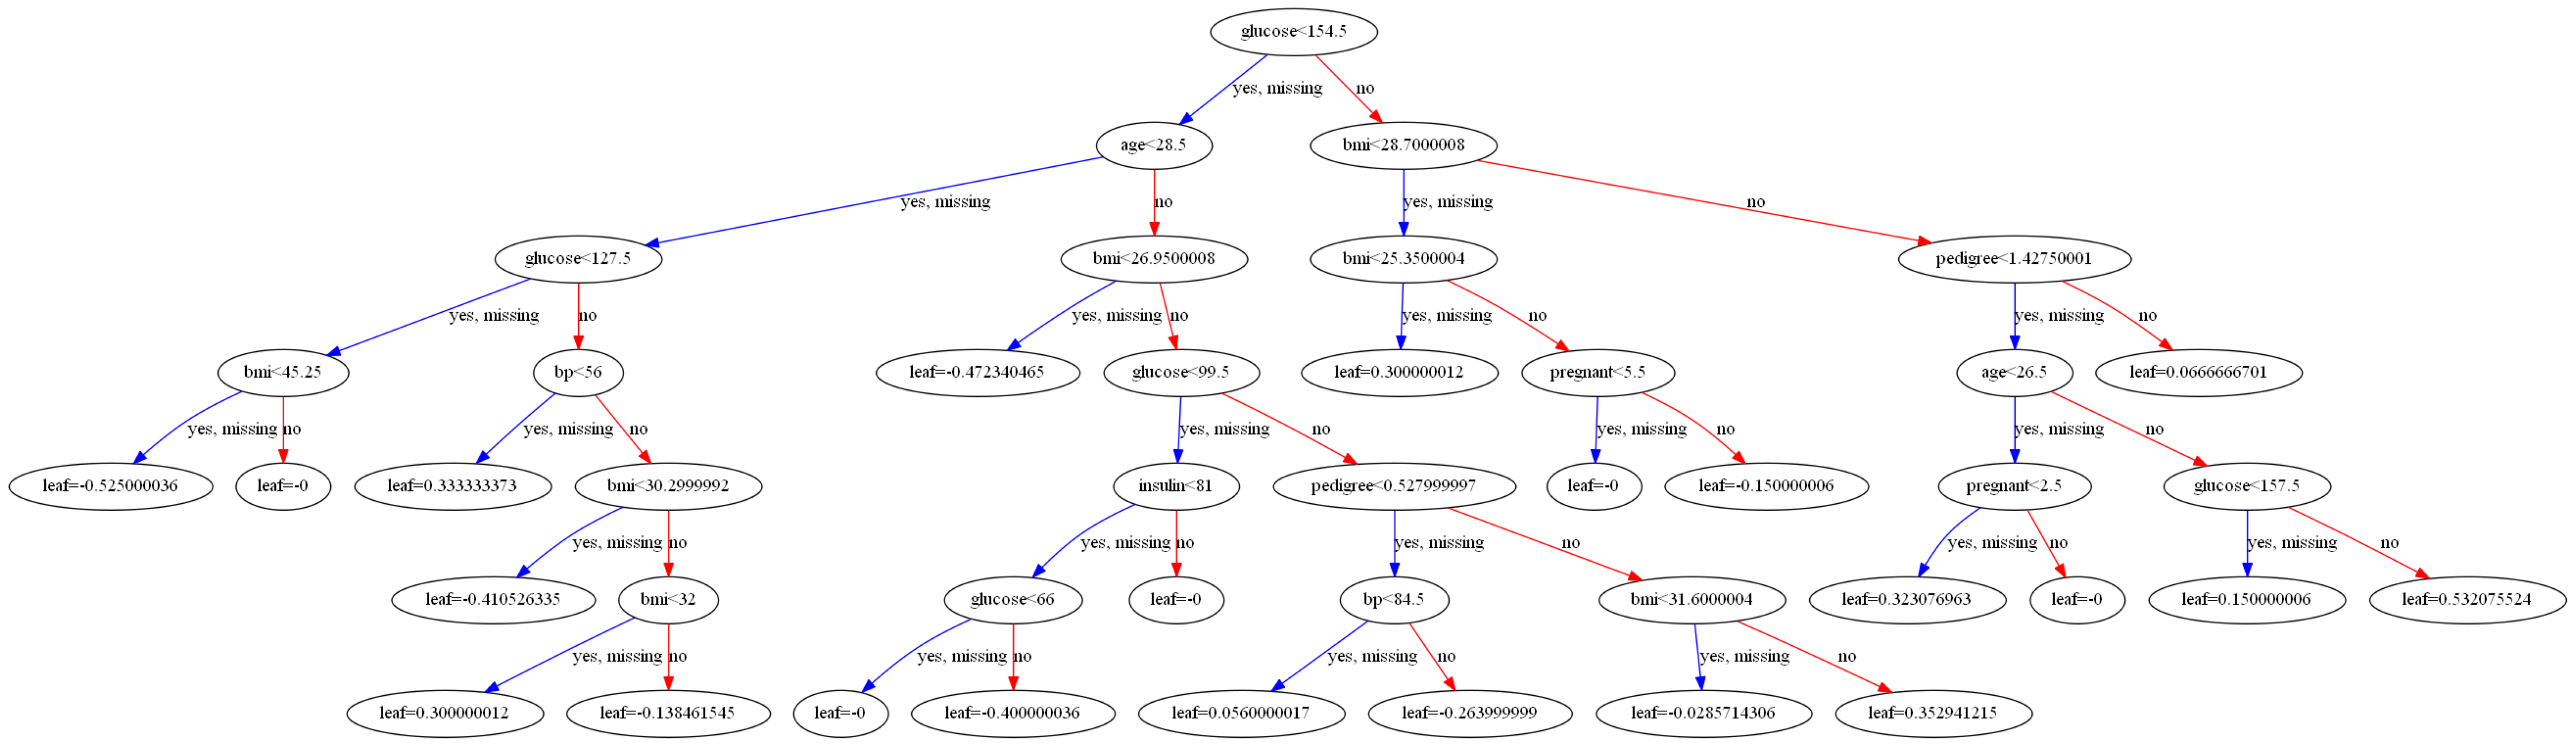

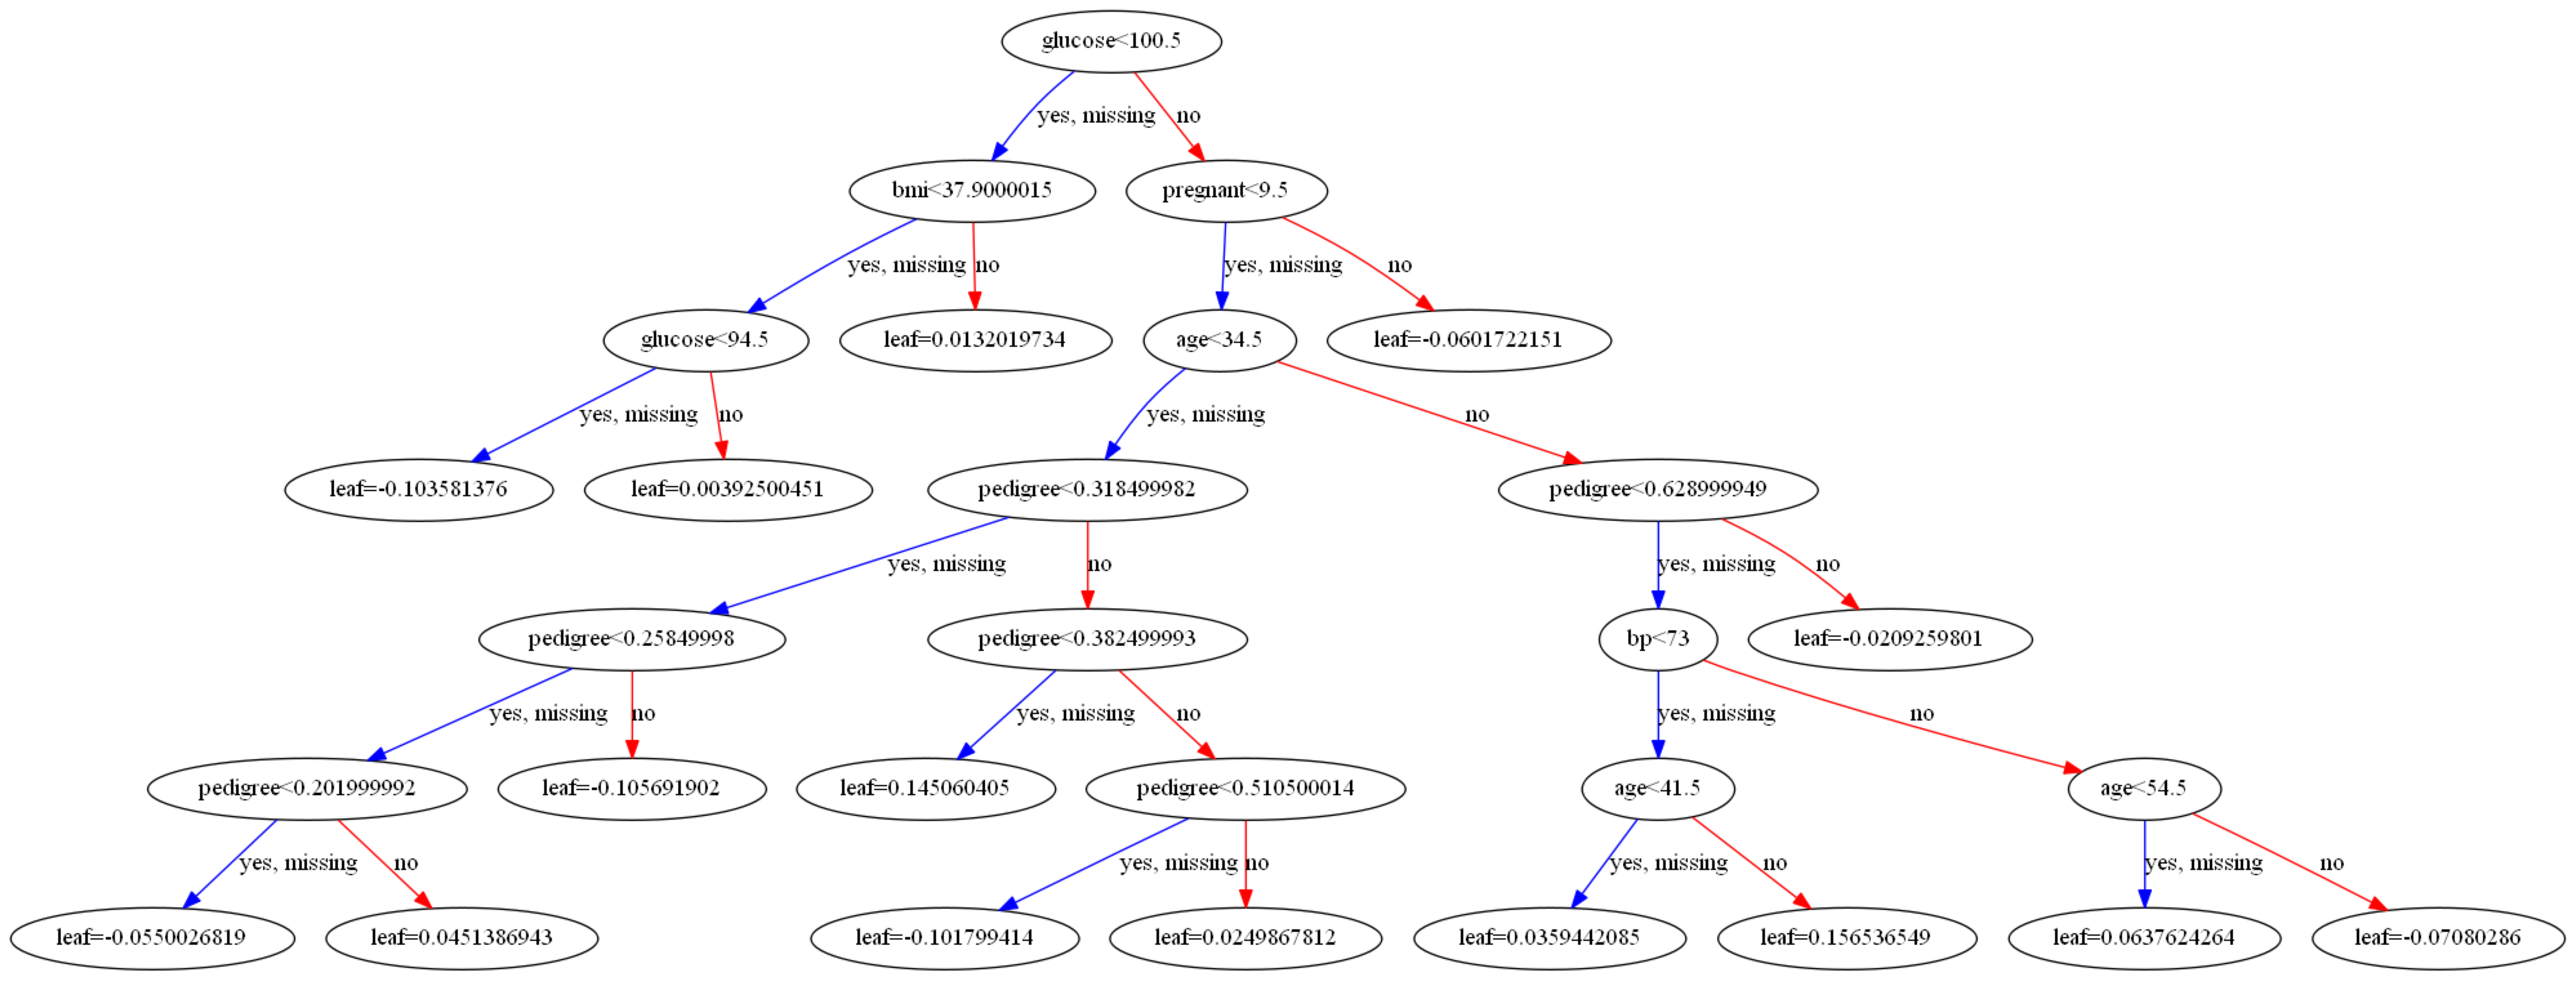

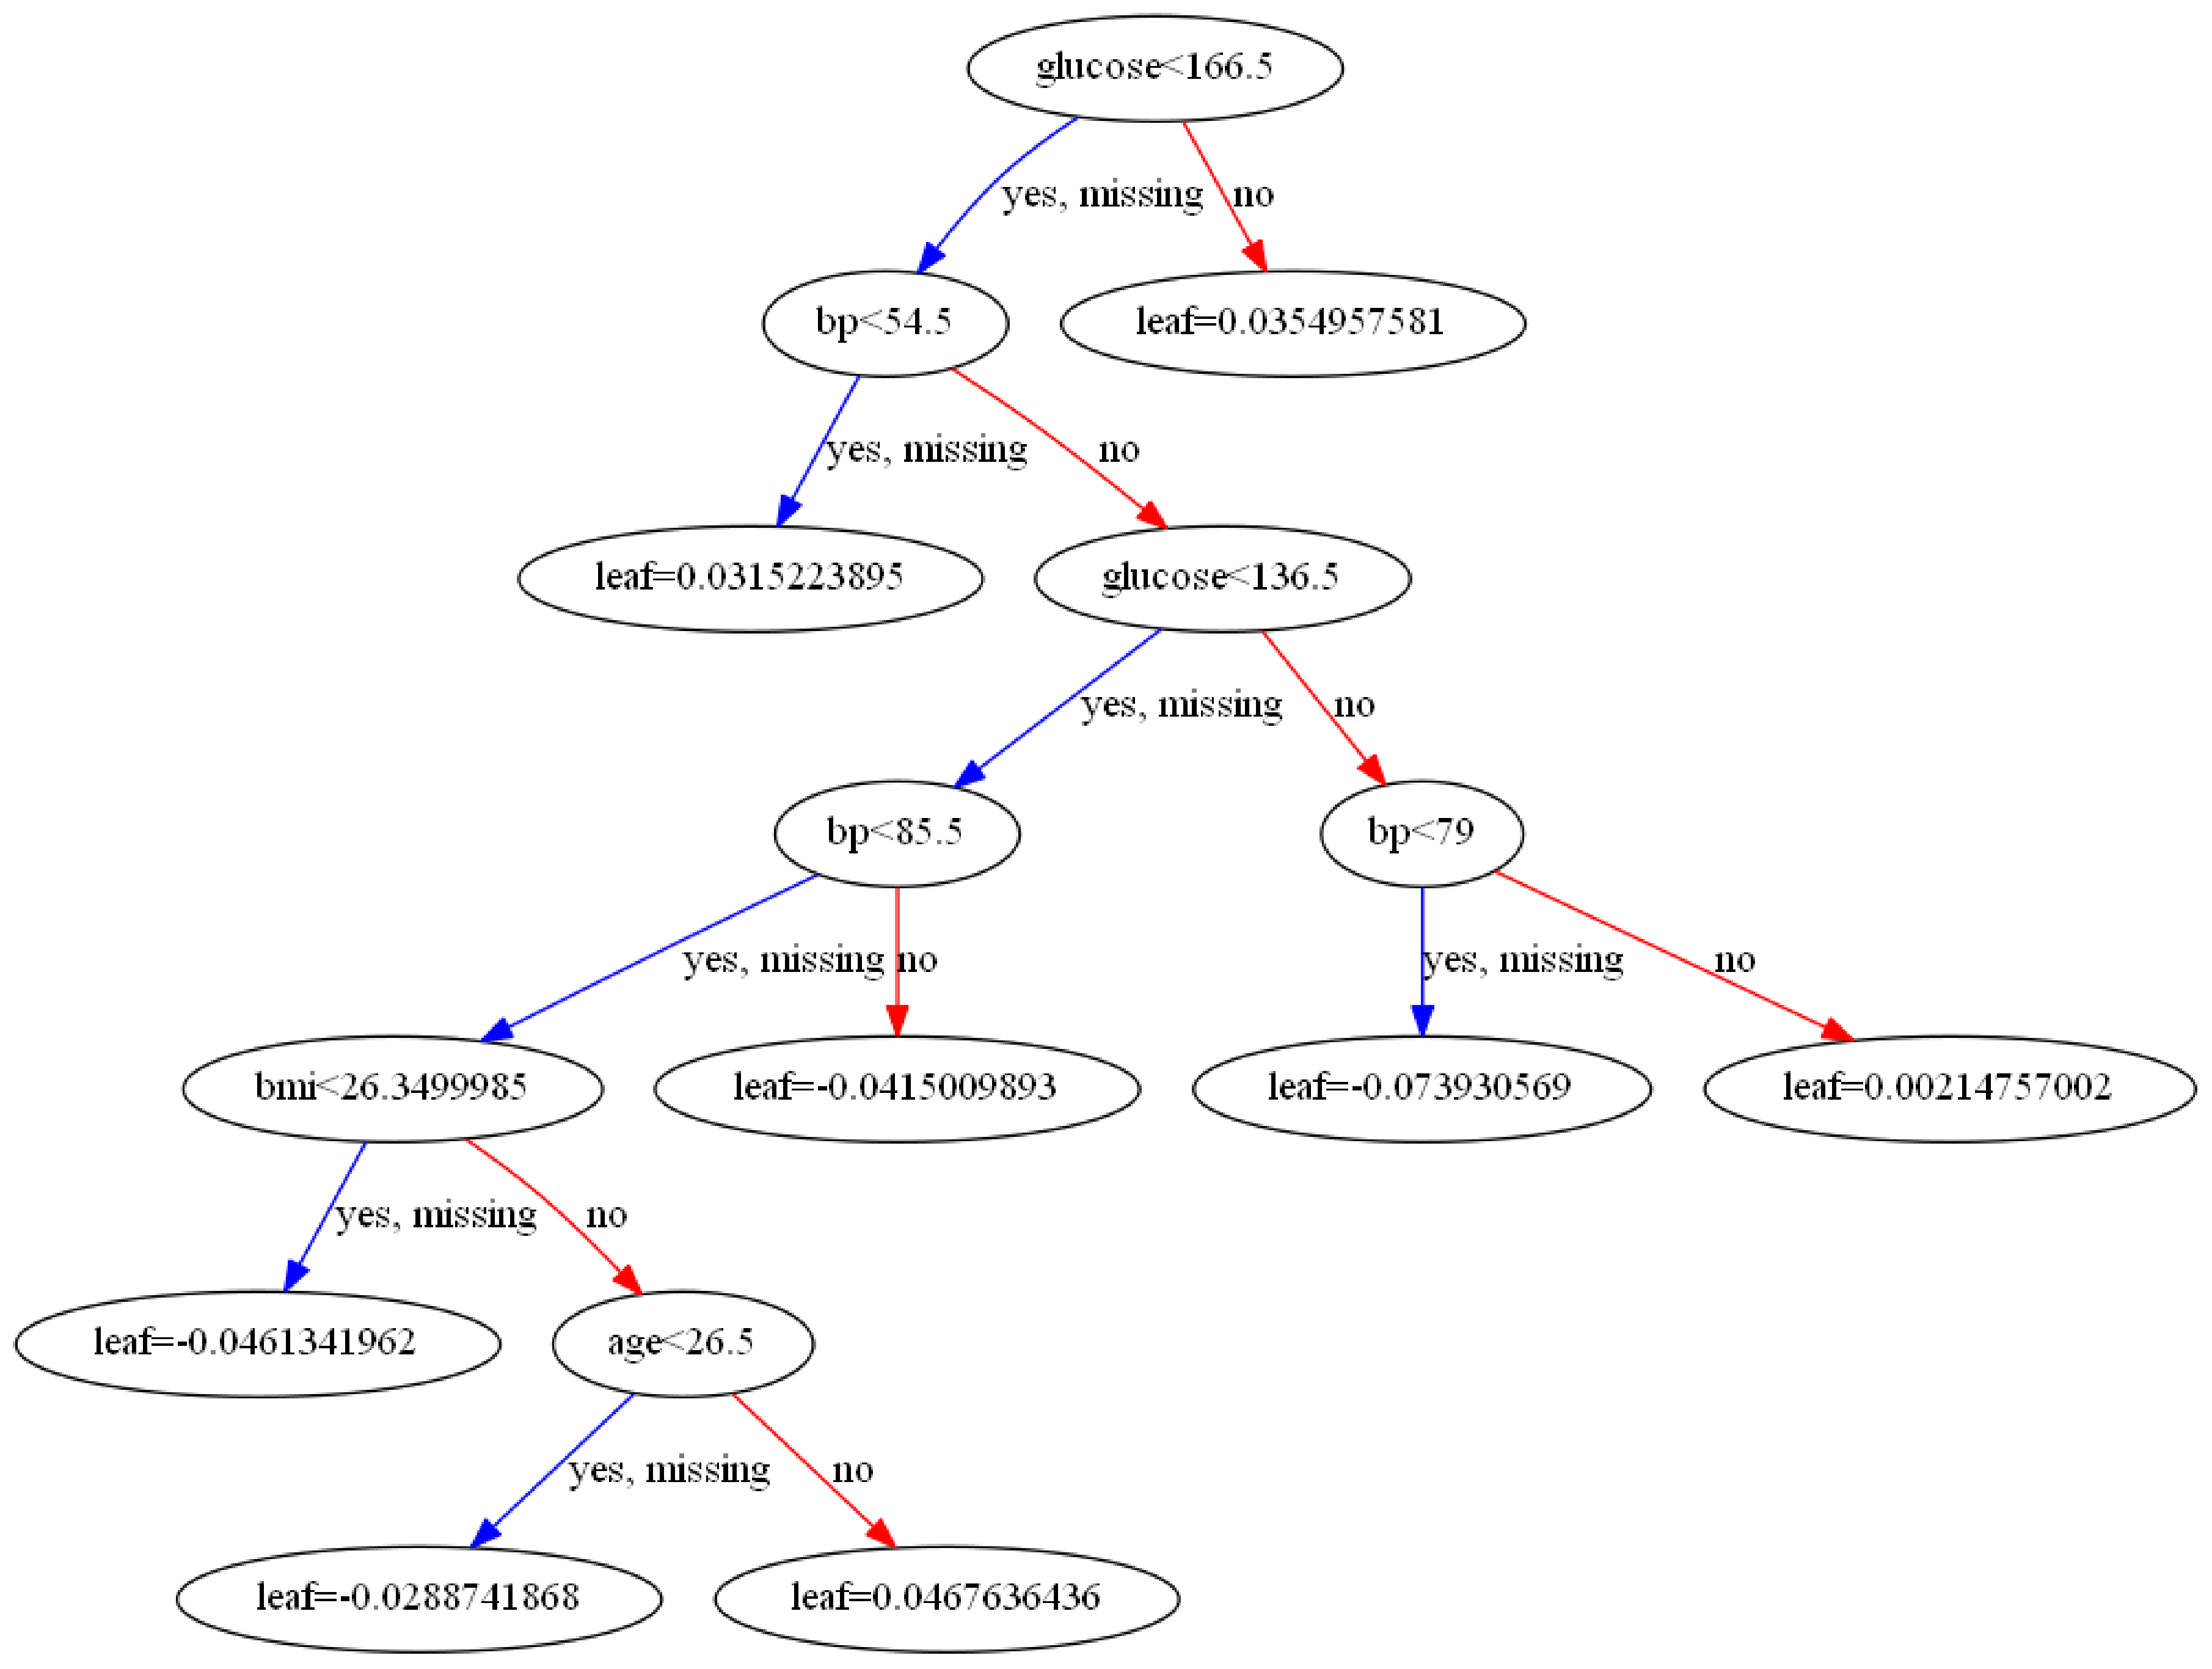

In [83]:
##set up the parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0)
plt.show()

# Plot the 50th tree
xgb.plot_tree(xgb_clf, num_trees=50)
plt.show()

# Plot the 83th  tree 
xgb.plot_tree(xgb_clf, num_trees=83)
plt.show()